<a href="https://colab.research.google.com/github/seabnavin19/Design-Pattern-In-Java/blob/master/PostClassification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## X train

In [2]:
import pickle
cop3=[]
with open("/content/drive/MyDrive/Post_Dataset/Data/sentence_train_lower.txt", "rb") as fp:   # Unpickling
 train = pickle.load(fp)
with open("/content/drive/MyDrive/Post_Dataset/Data/sentence_test_lower.txt", "rb") as fp:   # Unpickling
 test = pickle.load(fp)
# with open("/content/drive/MyDrive/Post_Dataset/Data/sentence_normal_lower.txt", "rb") as fp:   # Unpickling
#  normal = pickle.load(fp)

# with open("/content/drive/MyDrive/Post_Dataset/Data/sentence_report_lower.txt", "rb") as fp:   # Unpickling
#  report = pickle.load(fp)

cop3.extend(train)
cop3.extend(test)
# cop3.extend(normal)
# cop3.extend(report)
test=[]
train=[]
normal=[]
report=[]
len(cop3)

24193

In [3]:
# df_train=pd.read_csv("/content/drive/MyDrive/Post_Dataset/Data/train_result.csv")
# df_train

## Y Train

In [4]:
df_train=pd.read_csv("/content/drive/MyDrive/Post_Dataset/Data/train_result.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Post_Dataset/Data/test_result.csv")
# df_normal=pd.read_csv("/content/drive/MyDrive/Post_Dataset/Data/result_normal_v2.csv")
# df_report=pd.read_csv("/content/drive/MyDrive/Post_Dataset/Data/report_result.csv")

In [5]:
df_test

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,string_value,NO_let,Coverted_String,Label,probability
0,0,0,0,0,0,0,分享你今個sem靚咗grade嘅course,分享 今個 sem grade course,分享 今個 sem grade course,-1,0.648897
1,1,1,1,1,1,1,出cheat者可恥至極,出 cheat 可恥 極,出 cheat 可恥 極,8,0.800065
2,2,2,2,2,2,2,有冇人有first hon嘅stat?,first hon stat,first hon stat,-1,0.537820
3,3,3,3,3,3,3,出咗GPA...,出 GPA,出 GPA,0,0.553232
4,4,4,4,4,4,4,Cgpa 得2.97係咪可而quit🥲,Cgpa 係咪 quit,Cgpa 係咪 quit,3,0.473824
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,9995,9995,9995,9995,好心dse應屆生同asso ，hd，ive唔好做爛市,好心 dse 應屆生 asso ive 唔 爛 市,好心 dse 應屆生 asso hd ive 唔 爛 市,4,0.678905
9996,9996,9996,9996,9996,9996,9996,有冇人想搵教練教 平freelance,想 教 練 教 平 freelanc,想 教 練 教 平 freelanc,2,0.535981
9997,9997,9997,9997,9997,9997,9997,af3111 IA2,IA,af IA,0,0.738283
9998,9998,9998,9998,9998,9998,9998,交換source,交換 source,交換 source,7,0.756777


In [6]:
# df.fillna(" ",inplace=True)
# df_train.replace({6:},inplace=True)
df_train.loc[(df_train["Label"].isin([6,8])) & (df_train["probability"]>=0.10), "Label"] = "Bad"
df_test.loc[(df_test["Label"].isin([6,8])) & (df_test["probability"]>=0.10), "Label"] = "Bad"
# df_normal.loc[~df_normal["Label"].isin([6,8]), "Label"] = "Not Bad"
# df_report.loc[~df_report["Label"].isin([6,8]), "Label"] = "Not Bad"
df_test[df_test["Label"]==8]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,string_value,NO_let,Coverted_String,Label,probability


In [7]:
# df_train.replace({6:"Bad",8:"Bad"},inplace=True)
# df_test.replace({6:"Bad",8:"Bad"},inplace=True)
# df_normal.replace({6:"Bad",8:"Bad"},inplace=True)
# df_report.replace({6:"Bad",8:"Bad"},inplace=True)
df_train.loc[df_train["Label"]!="Bad", "Label"] = "Not Bad"
df_test.loc[df_test["Label"]!="Bad", "Label"] = "Not Bad"


In [8]:
df_train=df_train[["Label"]]
df_test=df_test[["Label"]]
# df_normal=df_normal[["Label"]]
# df_report=df_report[["Label"]]

In [9]:
df=df_train.append([df_test])
df_train=[]
df_test=[]
df_normal=[]
df_report=[]
df.shape


(24193, 1)

In [38]:
from collections import Counter
Counter(df["Label"])

Counter({'Bad': 4172, 'Not Bad': 20021})

## Previous Data

In [ ]:
from collections import Counter
Counter(df_train["Label"].values),Counter(df_test["Label"].values),Counter(df_report["Label"].values)

(Counter({0: 11461, 1: 2732}),
 Counter({0: 8560, 1: 1440}),
 Counter({0: 5926, 1: 2079}))

In [ ]:
Y=[]
Y.extend(df_train["Label"].values)
Y.extend(df_test["Label"].values)
# Y.extend(df_normal["Label"].values)
Y.extend(df_report["Label"].values)

In [ ]:
Counter(Y)

Counter({0: 25947, 1: 6251})

In [ ]:
topic_bad=df[df["Topic rating"]=="Bad"]["Topic"]
topic_good=df[df["Topic rating"]=="Not Bad"]["Topic"]

In [ ]:
topic_bad.shape,topic_good.shape

((7981,), (8111,))

In [ ]:
inter=np.intersect1d(topic_bad, topic_good)
# df.loc([df["Topic"].isin (inter)]["Topic rating"])=["Not Bad"]*177
df.loc[df["Topic"].isin(inter), "Topic rating"] = "Bad"


In [ ]:
df[df["Topic"].isin (inter)]["Topic rating"].unique()

array(['Bad'], dtype=object)

In [ ]:
from collections import Counter
d=Counter(df["Topic rating"])
d

Counter({'Bad': 8063, 'Not Bad': 8029})

In [ ]:
# df["Topic rating"].unique()
df=mw.copy()
df.shape

(14486, 1)

In [ ]:
#install independancies for chinese language
!pip install jieba 
!pip install stopwordsiso

In [ ]:
#use to detect english sentence
!pip install langdetect
from langdetect import detect

## Add Bad Word

In [ ]:
bad_word=['8婆','八婆','大波','閪','臭西','傻西','臭雞','狗公','公廁','厹','hall雞','含撚','中出','淫雞','淫賤''on9','sex','打飛','打j','屌','自慰','破處','好撚柒','好柒','扑野','撚樣']
# com=["test"]*len(bad_word)
# data={"Topic rating":["Bad"]*len(bad_word),"Topic":bad_word,"Community":com}
# df_marks = pd.DataFrame(data)
# df_marks1=df.append(df_marks)
# df_marks1
with open('/content/drive/MyDrive/Post_Dataset/sentences.npy', 'rb') as f:
    sentences = np.load(f)
sentences


array(['記 HK 超抵 玩 轉台 優惠 G 無限 任用', '学生 个人 兼职 援交 加', '轉 台大 優惠', ...,
       '캘 리 포 니 아', '揀 實習 開 case 定開 gp', '八奇 軍師 開始 明白 政府 玩 緊'],
      dtype='<U273')

In [ ]:
df.shape

(14551, 2)

## Data Preprocessing

In [ ]:
# import jieba
# import jieba.posseg as pseg
# import stopwordsiso
# import nltk
# nltk.download('stopwords')
# from stopwordsiso import stopwords 
# from nltk.corpus import stopwords as st
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

# i=1
# import re
# cop=[]


# def contains(s):
#     return not re.search(r'[^A-Za-z]+', s)

# for sen in df["Topic"]:

#   #to remove singal and number 
#   sen=re.sub(r'[^\w]', ' ', sen)
#   sen=re.sub(r'[0-9]', ' ', sen)

#   #convert chinese sentence to words
#   words = pseg.cut(sen)
#   # print(df["Topic"][1].values[0])
#   wo=[w.word for w in words if w.word not in stopwords(["zh"]) and w.word not in st.words("english")]

#   #to remove stickers from the sentence
  
#   for index  in range(len(wo)):
#     # if contains(wo[index]):
       
#         # if len(wo[index])<=2:
#         #   wo[index]=""

#     try:
#       detect(wo[index])
#     except:

#       wo[index]=""
#   wo_no_space=[]
#   for w1 in wo:
   
          
#     if w1!="":
#       if detect(w1)=="en":
#         w1=ps.stem(w1)
#         w1=w1.lower()
#       wo_no_space.append(w1)

#   me=" ".join(wo_no_space)
#   i+=1
#   print(i)
#   cop.append(me)

In [ ]:
# with open('/content/drive/MyDrive/Post_Dataset/sentences1.npy', 'wb') as f:
#     np.save(f, np.array(cop))
with open('/content/drive/MyDrive/Post_Dataset/sentences.npy', 'rb') as f:
    topic = np.load(f)

In [ ]:
# sentence_topic=topic+sentences
print(df["Community"][101])
sen_topic=np.core.defchararray.add(topic,sentences)

運動🏀⚽⚾🏉🏈🎾🎠🚣


## X_train

In [10]:
cop=[]
for i in cop3:
  cop.append(" ".join(i))
cop[0]
cop3=[]

In [11]:
len(cop)

24193

In [12]:
#use countVectorizer

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=10000)
# X = cv.fit_transform(cop).toarray()

# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(cop).toarray()
cop=[]
X.shape

(24193, 13447)

In [43]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Counter(Y)

NameError: ignored

## Imbalance Data

In [14]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.9)
X_train_res, y_train_res = os.fit_sample(X, y)
X_train_res.shape,y_train_res.shape
X=[]

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
Counter(y_train_res),Counter(y)

(Counter({0: 21461, 1: 17168}), Counter({0: 21461, 1: 2732}))

In [13]:
y=pd.get_dummies(df['Label'])
y=y.iloc[:,0].values
y
df=[]
# d=Counter(y)
# d


In [ ]:
# df_train=pd.read()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.20, random_state = 0)

In [16]:
# X_train=pd.concat([X_train,X_train]
X=[]
y=[]

## Model Selection

In [17]:
from sklearn.naive_bayes import MultinomialNB


In [18]:
from sklearn import metrics
import numpy as np
import itertools
previous_score=0
l=[]
for alpha in np.arange(0,2,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))
    

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8245268138801262
Alpha: 0.1, Score : 0.823869610935857
Alpha: 0.2, Score : 0.8218980021030494
Alpha: 0.30000000000000004, Score : 0.8188748685594112
Alpha: 0.4, Score : 0.8183491062039958
Alpha: 0.5, Score : 0.8166403785488959
Alpha: 0.6000000000000001, Score : 0.8155888538380652
Alpha: 0.7000000000000001, Score : 0.8151945320715037
Alpha: 0.8, Score : 0.814143007360673
Alpha: 0.9, Score : 0.8137486855941115
Alpha: 1.0, Score : 0.81164563617245
Alpha: 1.1, Score : 0.8090168243953733
Alpha: 1.2000000000000002, Score : 0.8090168243953733
Alpha: 1.3, Score : 0.8088853838065194
Alpha: 1.4000000000000001, Score : 0.8071766561514195
Alpha: 1.5, Score : 0.8063880126182965
Alpha: 1.6, Score : 0.8057308096740273
Alpha: 1.7000000000000002, Score : 0.8061251314405888
Alpha: 1.8, Score : 0.8050736067297581
Alpha: 1.9000000000000001, Score : 0.8048107255520505


In [19]:
bad_detect_model = MultinomialNB(alpha=0.001).fit(X_train, y_train)
print(bad_detect_model.score(X_test,y_test))
y_pred=bad_detect_model.predict(X_test)

0.8250525762355415


Text(69.0, 0.5, 'Truth')

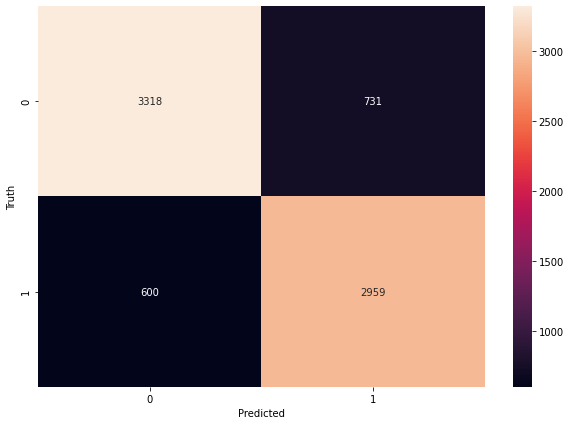

In [20]:

import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
len(cv.get_feature_names())

13447

In [ ]:
(1319+1105)/(1319+1105+471+324)

0.7530288909599254

In [ ]:
cv.get_feature_names()[4000]

'tricor'

In [21]:
import pickle
pickle.dump(cv.vocabulary_,open("/content/drive/MyDrive/Post_Dataset/Data/featur_test_train_09_test1.pkl","wb"))

#Load it later
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
transformer = TfidfTransformer()
loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("/content/drive/MyDrive/Post_Dataset/Data/featur_test_train_09_test1.pkl", "rb")))


In [29]:
tfidf = transformer.fit_transform(loaded_vec.fit_transform(np.array(["sp and fwb"])))
bad_detect_model.predict_proba(tfidf)[0][0]


0.9392700303484292

In [22]:
filename = '/content/drive/MyDrive/Post_Dataset/Data/model_test_train_09_test1.pkl'
pickle.dump(bad_detect_model, open(filename, 'wb'))

In [22]:
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# 即約ptgf
Joyce Fu 來原係紅底

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()

In [ ]:
lo.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lo.score(X_test,y_test)

0.7477477477477478